<a href="https://colab.research.google.com/github/debabratoRoy/Gravitational-Wave-Open-Data-Workshop/blob/main/Generating_Waveforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install -q PyCBC

In [4]:
from pycbc.waveform import get_td_waveform, fd_approximants, get_fd_waveform
import matplotlib.pyplot as plt

## Generate Waveform

We'll generate the gravitational waveform using oner of the available waveform aooroximants. The waveform can be generated as a Time Series using `get_td_waveform()` or in the Frequency Domain using `get_fd_waveform()`

The key parameters are the masses of the binary(given in the solar massed), the time between samples(in seconds), the starting gravitational-wave frequency(Hz) and the name of the approximant we'd like to use.

There are a variety of approximants available. Here **IMRPhenomD** approximant will be used.

In [5]:
# we can list the waveforms available for get_td_waeform and get_fd_waveform

from pycbc.waveform import td_approximants, fd_approximants

# List of td_approximants that are available
print('List of td_approximants that are available:\n')
print(td_approximants())

# List of fd_approximants that are available
print('\n\nList of fd_approximants that are available:\n')
print(fd_approximants())

List of td_approximants that are available:

['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'SEOBNRv4HM_PA', 'pSEOBNRv4HM_PA', 'IMRPhenomXAS_NRTidalv2',

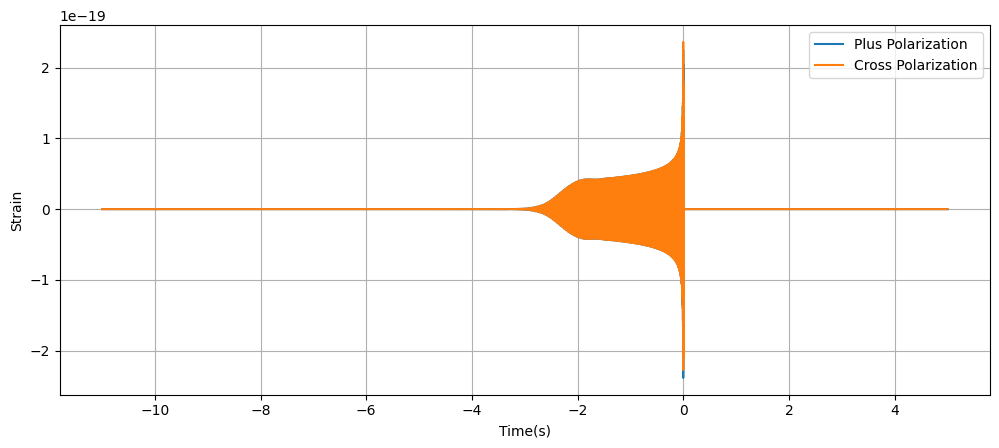

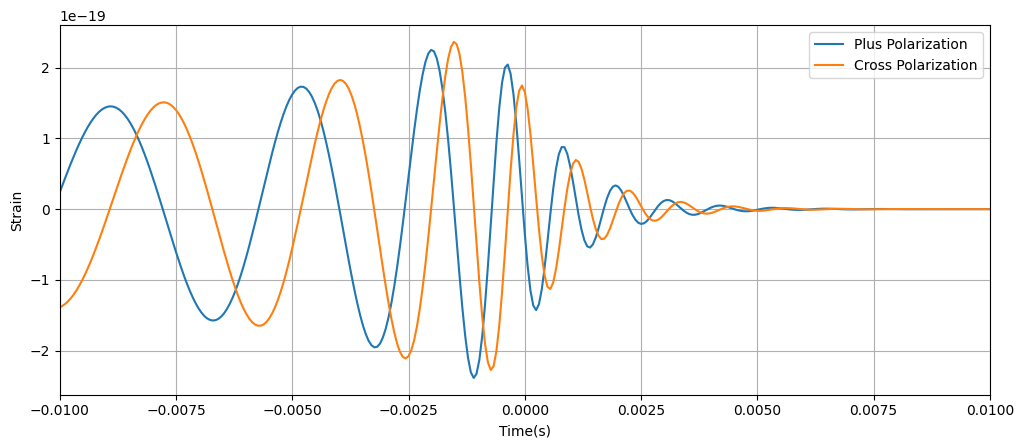

In [6]:
# the output of the function are the "plus" and "cross" polarizations
# of the gravitational-wave signal as viewd from the line of sight at
# a given source inclination (assumed face-on, i.e. zero inclination if not provided)

hp, hc = get_td_waveform(approximant="IMRPhenomD",
                         mass1 = 10,
                         mass2 = 10,
                         delta_t = 1.0 / 16384,
                         f_lower = 30
                         )

plt.figure(figsize=plt.figaspect(0.4))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')

plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.legend()
plt.grid()
plt.show()

# zoom in near the merger time
plt.figure(figsize=plt.figaspect(0.4))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')

plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.xlim(-0.01,0.01)
plt.legend()
plt.grid()
plt.show()

We can see that the two polarizations differ only  by the phase of the signal. This is a known property of the signal, when the orbital plane of the binary does not precess.

We can generate the same waveform in the frequency domain using `get_fd_waveform`

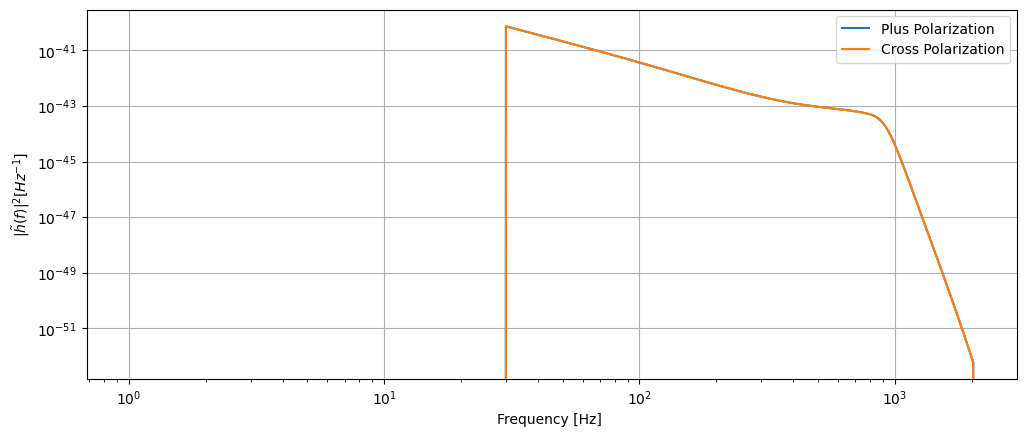

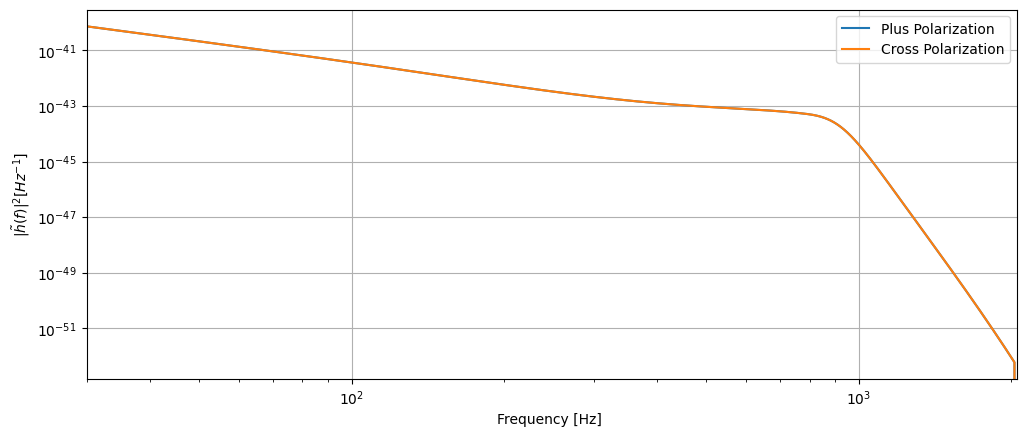

In [7]:
# the output of the function are the "plus" and "cross" polarizations
# of the gravitational-wave signal as viewd from the line of sight at
# a given source inclination (assumed face-on, i.e. zero inclination if not provided)

hp, hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1 = 10,
                         mass2 = 10,
                         delta_t = 1.0 / 16384,
                         f_lower = 30 ,
                         delta_f = 1.
                         )

plt.figure(figsize=plt.figaspect(0.4))
plt.loglog(hp.sample_frequencies, hp.squared_norm(), label='Plus Polarization')
plt.loglog(hp.sample_frequencies, hc.squared_norm(), label='Cross Polarization')

plt.xlabel('Frequency [Hz] ')
plt.ylabel(r'$|\tilde{h}(f)|^2 [Hz^{-1}] $')
plt.legend()
plt.grid()
plt.show()

# zoom in near the merger time
plt.figure(figsize=plt.figaspect(0.4))
plt.loglog(hp.sample_frequencies, hp.squared_norm(), label='Plus Polarization')
plt.loglog(hp.sample_frequencies, hc.squared_norm(), label='Cross Polarization')

plt.xlabel('Frequency [Hz] ')
plt.ylabel(r'$|\tilde{h}(f)|^2 [Hz^{-1}] $')
plt.xlim([30,2048])
plt.legend()
plt.grid()
plt.show()

## How does the waveform change with the mass of the binary?

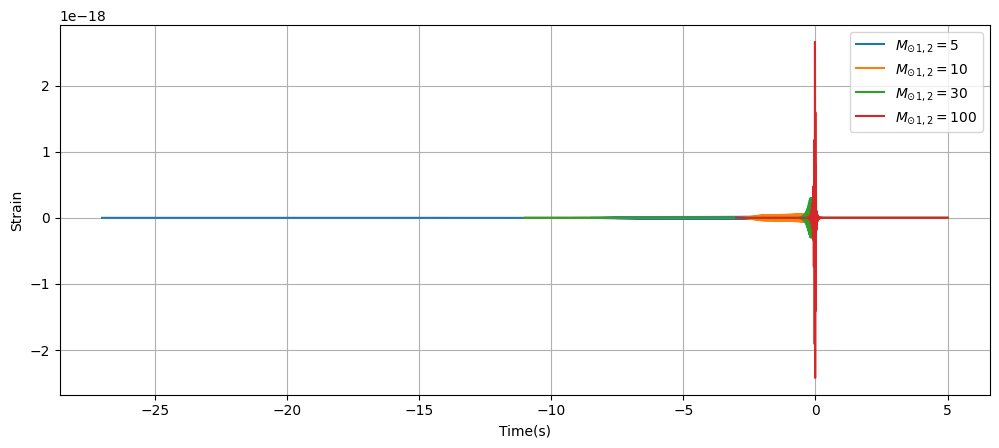

In [8]:
plt.figure(figsize=plt.figaspect(0.4))

for m in [5,10,30,100]:
  hp, hc = get_td_waveform(approximant="IMRPhenomD",
                           mass1 = m,
                           mass2 = m,
                           delta_t = 1.0 / 4096,
                           f_lower = 30
  )

  plt.plot(hp.sample_times, hp, label='$M_{\odot 1,2} = %s$' %m)
plt.legend()
plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.show()

## Changing the distance of the waveform

The luminosity distance of the source is also a parameter when you generate a waveform. The units used are Megaparsecs(i.e $10^6 pc $). No redshift effects are taken into account here, so there is a simpler linear relationship between distance and amplitude

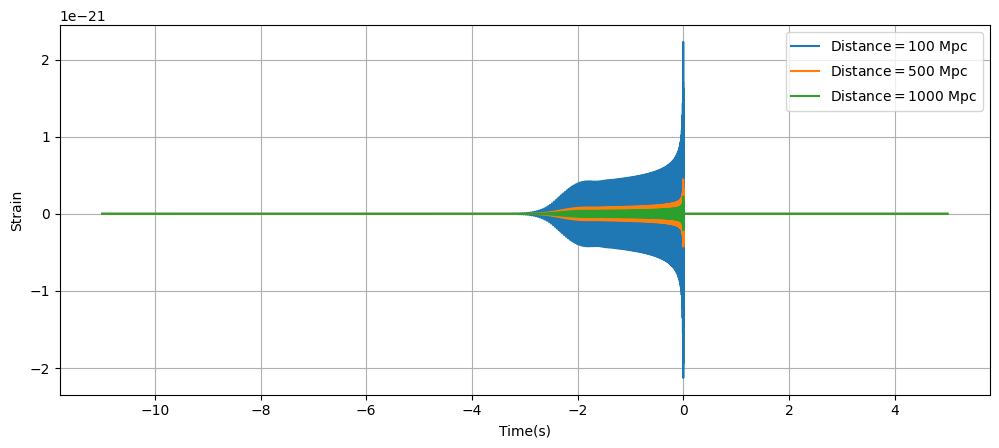

In [9]:
plt.figure(figsize=plt.figaspect(0.4))

for d in [100,500,1000]:
  hp, hc = get_td_waveform(approximant="IMRPhenomD",
                           mass1 = 10,
                           mass2 = 10,
                           delta_t = 1.0 / 4096,
                           f_lower = 30,
                           distance=d
  )

  plt.plot(hp.sample_times, hp, label='Distance$ = %s $ Mpc' % d)
plt.legend()
plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.show()